In [15]:
import torch
import torch.optim as optim
from torchsummary import summary

import warnings
warnings.filterwarnings("ignore")

In [16]:
from dataset import CIFAR10

In [17]:
data = CIFAR10()

Files already downloaded and verified
Files already downloaded and verified


In [18]:
train_loader , test_loader = data.get_loaders()

Files already downloaded and verified
Files already downloaded and verified


In [19]:
from utils import get_device, visualize_data

In [20]:
device = get_device()

Device :  cuda


In [21]:
classes = [
            "plane",
            "car",
            "bird",
            "cat",
            "deer",
            "dog",
            "frog",
            "horse",
            "ship",
            "truck",
        ]

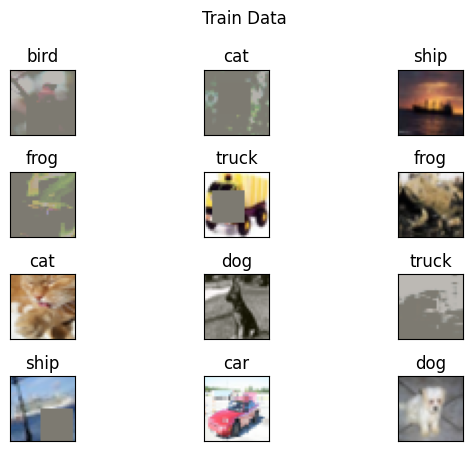

In [22]:
visualize_data(train_loader, 12, "Train Data", classes)

In [23]:
from model import Model

In [24]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)

cuda


In [25]:
model = Model().to(device)

In [26]:
summary(model, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 24, 32, 32]             648
       BatchNorm2d-2           [-1, 24, 32, 32]              48
           Dropout-3           [-1, 24, 32, 32]               0
              ReLU-4           [-1, 24, 32, 32]               0
            Conv2d-5           [-1, 24, 32, 32]             216
       BatchNorm2d-6           [-1, 24, 32, 32]              48
           Dropout-7           [-1, 24, 32, 32]               0
              ReLU-8           [-1, 24, 32, 32]               0
            Conv2d-9           [-1, 24, 32, 32]             576
           Conv2d-10           [-1, 32, 30, 30]           6,912
      BatchNorm2d-11           [-1, 32, 30, 30]              64
          Dropout-12           [-1, 32, 30, 30]               0
             ReLU-13           [-1, 32, 30, 30]               0
           Conv2d-14           [-1, 32,

In [27]:
from backprop import (
    train,
    test,
    plot_graphs,
    get_misclassified_images,
    show_misclassified_images
)

In [29]:
model =  Model().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, patience=1, verbose=True, factor=0.1)

train_losses = []
test_losses = []
train_acc = []
test_acc = []

EPOCHS = 50

for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    train(model, device, train_loader, optimizer, epoch, train_losses, train_acc)
    test_loss = test(model, device, test_loader, test_losses, test_acc)
    scheduler.step(test_loss)

EPOCH: 0


Loss=1.432639241218567 Batch_id=390 Accuracy=42.01: 100%|██████████| 391/391 [00:40<00:00,  9.56it/s]



Test set: Average loss: 1.2009, Accuracy: 5646/10000 (56.46%)

EPOCH: 1


Loss=1.3280409574508667 Batch_id=390 Accuracy=55.41: 100%|██████████| 391/391 [00:40<00:00,  9.69it/s]



Test set: Average loss: 1.0395, Accuracy: 6324/10000 (63.24%)

EPOCH: 2


Loss=0.9479857683181763 Batch_id=390 Accuracy=60.87: 100%|██████████| 391/391 [00:40<00:00,  9.73it/s]



Test set: Average loss: 0.8410, Accuracy: 7047/10000 (70.47%)

EPOCH: 3


Loss=0.9854930639266968 Batch_id=390 Accuracy=64.37: 100%|██████████| 391/391 [00:40<00:00,  9.77it/s]



Test set: Average loss: 0.7569, Accuracy: 7331/10000 (73.31%)

EPOCH: 4


Loss=0.7229598760604858 Batch_id=390 Accuracy=66.44: 100%|██████████| 391/391 [00:39<00:00,  9.78it/s]



Test set: Average loss: 0.7533, Accuracy: 7373/10000 (73.73%)

EPOCH: 5


Loss=0.954201877117157 Batch_id=390 Accuracy=67.87: 100%|██████████| 391/391 [00:40<00:00,  9.77it/s]



Test set: Average loss: 0.7058, Accuracy: 7546/10000 (75.46%)

EPOCH: 6


Loss=0.8322172164916992 Batch_id=390 Accuracy=69.37: 100%|██████████| 391/391 [00:40<00:00,  9.72it/s]



Test set: Average loss: 0.6514, Accuracy: 7696/10000 (76.96%)

EPOCH: 7


Loss=0.9591180086135864 Batch_id=390 Accuracy=70.61: 100%|██████████| 391/391 [00:40<00:00,  9.75it/s]



Test set: Average loss: 0.6496, Accuracy: 7732/10000 (77.32%)

EPOCH: 8


Loss=0.9271565675735474 Batch_id=390 Accuracy=71.34: 100%|██████████| 391/391 [00:39<00:00,  9.93it/s]



Test set: Average loss: 0.6262, Accuracy: 7832/10000 (78.32%)

EPOCH: 9


Loss=0.7504866719245911 Batch_id=390 Accuracy=72.17: 100%|██████████| 391/391 [00:39<00:00,  9.83it/s]



Test set: Average loss: 0.5905, Accuracy: 7988/10000 (79.88%)

EPOCH: 10


Loss=0.7504504919052124 Batch_id=390 Accuracy=72.91: 100%|██████████| 391/391 [00:39<00:00,  9.81it/s]



Test set: Average loss: 0.6189, Accuracy: 7862/10000 (78.62%)

EPOCH: 11


Loss=0.604110598564148 Batch_id=390 Accuracy=73.48: 100%|██████████| 391/391 [00:39<00:00,  9.88it/s]



Test set: Average loss: 0.5962, Accuracy: 7957/10000 (79.57%)

EPOCH: 12


Loss=0.5710312724113464 Batch_id=390 Accuracy=75.61: 100%|██████████| 391/391 [00:39<00:00,  9.80it/s]



Test set: Average loss: 0.5119, Accuracy: 8217/10000 (82.17%)

EPOCH: 13


Loss=0.9986537098884583 Batch_id=390 Accuracy=76.21: 100%|██████████| 391/391 [00:40<00:00,  9.72it/s]



Test set: Average loss: 0.5088, Accuracy: 8232/10000 (82.32%)

EPOCH: 14


Loss=0.7216619253158569 Batch_id=390 Accuracy=76.44: 100%|██████████| 391/391 [00:40<00:00,  9.77it/s]



Test set: Average loss: 0.5052, Accuracy: 8273/10000 (82.73%)

EPOCH: 15


Loss=0.6744394898414612 Batch_id=390 Accuracy=76.69: 100%|██████████| 391/391 [00:39<00:00,  9.94it/s]



Test set: Average loss: 0.4997, Accuracy: 8293/10000 (82.93%)

EPOCH: 16


Loss=0.6731998324394226 Batch_id=390 Accuracy=76.95: 100%|██████████| 391/391 [00:39<00:00,  9.91it/s]



Test set: Average loss: 0.5024, Accuracy: 8280/10000 (82.80%)

EPOCH: 17


Loss=0.5913668870925903 Batch_id=390 Accuracy=76.78: 100%|██████████| 391/391 [00:40<00:00,  9.76it/s]



Test set: Average loss: 0.5005, Accuracy: 8286/10000 (82.86%)

EPOCH: 18


Loss=0.7690154910087585 Batch_id=390 Accuracy=77.14: 100%|██████████| 391/391 [00:40<00:00,  9.66it/s]



Test set: Average loss: 0.4962, Accuracy: 8311/10000 (83.11%)

EPOCH: 19


Loss=0.4095349907875061 Batch_id=390 Accuracy=77.14: 100%|██████████| 391/391 [00:39<00:00,  9.83it/s]



Test set: Average loss: 0.4945, Accuracy: 8331/10000 (83.31%)

EPOCH: 20


Loss=0.6261695623397827 Batch_id=390 Accuracy=77.49: 100%|██████████| 391/391 [00:40<00:00,  9.70it/s]



Test set: Average loss: 0.4945, Accuracy: 8323/10000 (83.23%)

EPOCH: 21


Loss=0.7628880739212036 Batch_id=390 Accuracy=77.15: 100%|██████████| 391/391 [00:39<00:00,  9.81it/s]



Test set: Average loss: 0.4924, Accuracy: 8313/10000 (83.13%)

EPOCH: 22


Loss=0.6725835204124451 Batch_id=390 Accuracy=77.32: 100%|██████████| 391/391 [00:39<00:00,  9.89it/s]



Test set: Average loss: 0.4938, Accuracy: 8313/10000 (83.13%)

EPOCH: 23


Loss=0.6120893359184265 Batch_id=390 Accuracy=77.31: 100%|██████████| 391/391 [00:39<00:00,  9.85it/s]



Test set: Average loss: 0.4915, Accuracy: 8320/10000 (83.20%)

EPOCH: 24


Loss=0.6731535196304321 Batch_id=390 Accuracy=77.24: 100%|██████████| 391/391 [00:40<00:00,  9.77it/s]



Test set: Average loss: 0.4933, Accuracy: 8297/10000 (82.97%)

EPOCH: 25


Loss=0.8182762861251831 Batch_id=390 Accuracy=77.21: 100%|██████████| 391/391 [00:39<00:00,  9.79it/s]



Test set: Average loss: 0.4929, Accuracy: 8324/10000 (83.24%)

EPOCH: 26


Loss=0.6965294480323792 Batch_id=390 Accuracy=77.46: 100%|██████████| 391/391 [00:39<00:00,  9.81it/s]



Test set: Average loss: 0.4902, Accuracy: 8319/10000 (83.19%)

EPOCH: 27


Loss=0.6813516020774841 Batch_id=390 Accuracy=77.49: 100%|██████████| 391/391 [00:40<00:00,  9.76it/s]



Test set: Average loss: 0.4927, Accuracy: 8323/10000 (83.23%)

EPOCH: 28


Loss=0.5960338115692139 Batch_id=390 Accuracy=77.37: 100%|██████████| 391/391 [00:39<00:00,  9.81it/s]



Test set: Average loss: 0.4905, Accuracy: 8313/10000 (83.13%)

EPOCH: 29


Loss=0.6566531658172607 Batch_id=390 Accuracy=77.45: 100%|██████████| 391/391 [00:39<00:00,  9.88it/s]



Test set: Average loss: 0.4926, Accuracy: 8329/10000 (83.29%)

EPOCH: 30


Loss=0.6931867003440857 Batch_id=390 Accuracy=77.49: 100%|██████████| 391/391 [00:39<00:00,  9.90it/s]



Test set: Average loss: 0.4931, Accuracy: 8314/10000 (83.14%)

EPOCH: 31


Loss=0.9589520692825317 Batch_id=390 Accuracy=77.14: 100%|██████████| 391/391 [00:39<00:00,  9.84it/s]



Test set: Average loss: 0.4924, Accuracy: 8310/10000 (83.10%)

EPOCH: 32


Loss=0.6775964498519897 Batch_id=390 Accuracy=77.47: 100%|██████████| 391/391 [00:40<00:00,  9.77it/s]



Test set: Average loss: 0.4911, Accuracy: 8324/10000 (83.24%)

EPOCH: 33


Loss=0.7051746845245361 Batch_id=390 Accuracy=77.25: 100%|██████████| 391/391 [00:39<00:00,  9.84it/s]



Test set: Average loss: 0.4942, Accuracy: 8317/10000 (83.17%)

EPOCH: 34


Loss=0.710289716720581 Batch_id=390 Accuracy=77.27: 100%|██████████| 391/391 [00:39<00:00,  9.79it/s]



Test set: Average loss: 0.4920, Accuracy: 8317/10000 (83.17%)

EPOCH: 35


Loss=0.496633380651474 Batch_id=390 Accuracy=77.29: 100%|██████████| 391/391 [00:39<00:00,  9.86it/s]



Test set: Average loss: 0.4913, Accuracy: 8327/10000 (83.27%)

EPOCH: 36


Loss=0.795691728591919 Batch_id=390 Accuracy=77.37: 100%|██████████| 391/391 [00:39<00:00,  9.88it/s]



Test set: Average loss: 0.4930, Accuracy: 8312/10000 (83.12%)

EPOCH: 37


Loss=0.7068708539009094 Batch_id=390 Accuracy=77.34: 100%|██████████| 391/391 [00:39<00:00,  9.94it/s]



Test set: Average loss: 0.4908, Accuracy: 8315/10000 (83.15%)

EPOCH: 38


Loss=0.6701415777206421 Batch_id=390 Accuracy=77.43: 100%|██████████| 391/391 [00:39<00:00,  9.83it/s]



Test set: Average loss: 0.4917, Accuracy: 8312/10000 (83.12%)

EPOCH: 39


Loss=0.5242955088615417 Batch_id=390 Accuracy=77.59: 100%|██████████| 391/391 [00:39<00:00,  9.88it/s]



Test set: Average loss: 0.4916, Accuracy: 8310/10000 (83.10%)

EPOCH: 40


Loss=0.6807762384414673 Batch_id=390 Accuracy=77.20: 100%|██████████| 391/391 [00:39<00:00,  9.78it/s]



Test set: Average loss: 0.4940, Accuracy: 8320/10000 (83.20%)

EPOCH: 41


Loss=0.704753041267395 Batch_id=390 Accuracy=77.25: 100%|██████████| 391/391 [00:39<00:00,  9.80it/s]



Test set: Average loss: 0.4909, Accuracy: 8320/10000 (83.20%)

EPOCH: 42


Loss=0.6481873989105225 Batch_id=390 Accuracy=77.38: 100%|██████████| 391/391 [00:39<00:00,  9.92it/s]



Test set: Average loss: 0.4930, Accuracy: 8322/10000 (83.22%)

EPOCH: 43


Loss=0.49365538358688354 Batch_id=390 Accuracy=77.27: 100%|██████████| 391/391 [00:39<00:00,  9.85it/s]



Test set: Average loss: 0.4923, Accuracy: 8319/10000 (83.19%)

EPOCH: 44


Loss=0.4934144914150238 Batch_id=390 Accuracy=77.20: 100%|██████████| 391/391 [00:39<00:00,  9.86it/s]



Test set: Average loss: 0.4929, Accuracy: 8316/10000 (83.16%)

EPOCH: 45


Loss=0.6317669153213501 Batch_id=390 Accuracy=77.18: 100%|██████████| 391/391 [00:39<00:00,  9.85it/s]



Test set: Average loss: 0.4913, Accuracy: 8314/10000 (83.14%)

EPOCH: 46


Loss=0.8345945477485657 Batch_id=390 Accuracy=77.37: 100%|██████████| 391/391 [00:39<00:00,  9.83it/s]



Test set: Average loss: 0.4942, Accuracy: 8312/10000 (83.12%)

EPOCH: 47


Loss=0.8382678031921387 Batch_id=390 Accuracy=77.40: 100%|██████████| 391/391 [00:39<00:00,  9.90it/s]



Test set: Average loss: 0.4923, Accuracy: 8307/10000 (83.07%)

EPOCH: 48


Loss=0.625135064125061 Batch_id=390 Accuracy=77.66: 100%|██████████| 391/391 [00:39<00:00,  9.78it/s]



Test set: Average loss: 0.4918, Accuracy: 8321/10000 (83.21%)

EPOCH: 49


Loss=0.512175440788269 Batch_id=390 Accuracy=77.41: 100%|██████████| 391/391 [00:39<00:00,  9.78it/s]



Test set: Average loss: 0.4913, Accuracy: 8310/10000 (83.10%)



In [31]:
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
# scheduler = StepLR(optimizer, step_size=10, gamma=0.1)


EPOCHS = 10
for epoch in range(EPOCHS):
   train(model, device, train_loader, optimizer, epoch, train_losses, train_acc)
   test_loss = test(model, device, test_loader, test_losses, test_acc)
   scheduler.step(test_loss)

Loss=1.007023572921753 Batch_id=390 Accuracy=74.72: 100%|██████████| 391/391 [00:40<00:00,  9.74it/s]



Test set: Average loss: 0.5788, Accuracy: 8028/10000 (80.28%)



Loss=0.6903573274612427 Batch_id=390 Accuracy=74.98: 100%|██████████| 391/391 [00:39<00:00,  9.90it/s]



Test set: Average loss: 0.5581, Accuracy: 8059/10000 (80.59%)



Loss=0.7374206781387329 Batch_id=390 Accuracy=75.15: 100%|██████████| 391/391 [00:39<00:00,  9.94it/s]



Test set: Average loss: 0.5221, Accuracy: 8216/10000 (82.16%)



Loss=0.7464965581893921 Batch_id=390 Accuracy=75.54: 100%|██████████| 391/391 [00:39<00:00,  9.84it/s]



Test set: Average loss: 0.5276, Accuracy: 8161/10000 (81.61%)



Loss=0.7489084005355835 Batch_id=390 Accuracy=76.09: 100%|██████████| 391/391 [00:39<00:00,  9.83it/s]



Test set: Average loss: 0.5117, Accuracy: 8263/10000 (82.63%)



Loss=0.7166845202445984 Batch_id=390 Accuracy=76.26: 100%|██████████| 391/391 [00:39<00:00,  9.82it/s]



Test set: Average loss: 0.5283, Accuracy: 8189/10000 (81.89%)



Loss=0.6193222403526306 Batch_id=390 Accuracy=76.59: 100%|██████████| 391/391 [00:39<00:00,  9.82it/s]



Test set: Average loss: 0.5350, Accuracy: 8195/10000 (81.95%)



Loss=0.6512707471847534 Batch_id=390 Accuracy=77.04: 100%|██████████| 391/391 [00:39<00:00,  9.88it/s]



Test set: Average loss: 0.5290, Accuracy: 8207/10000 (82.07%)



Loss=0.6267474889755249 Batch_id=390 Accuracy=77.25: 100%|██████████| 391/391 [00:39<00:00,  9.99it/s]



Test set: Average loss: 0.5242, Accuracy: 8242/10000 (82.42%)



Loss=0.7258907556533813 Batch_id=390 Accuracy=77.40: 100%|██████████| 391/391 [00:39<00:00,  9.88it/s]



Test set: Average loss: 0.4992, Accuracy: 8277/10000 (82.77%)



Text(0.5, 1.0, 'Test Accuracy')

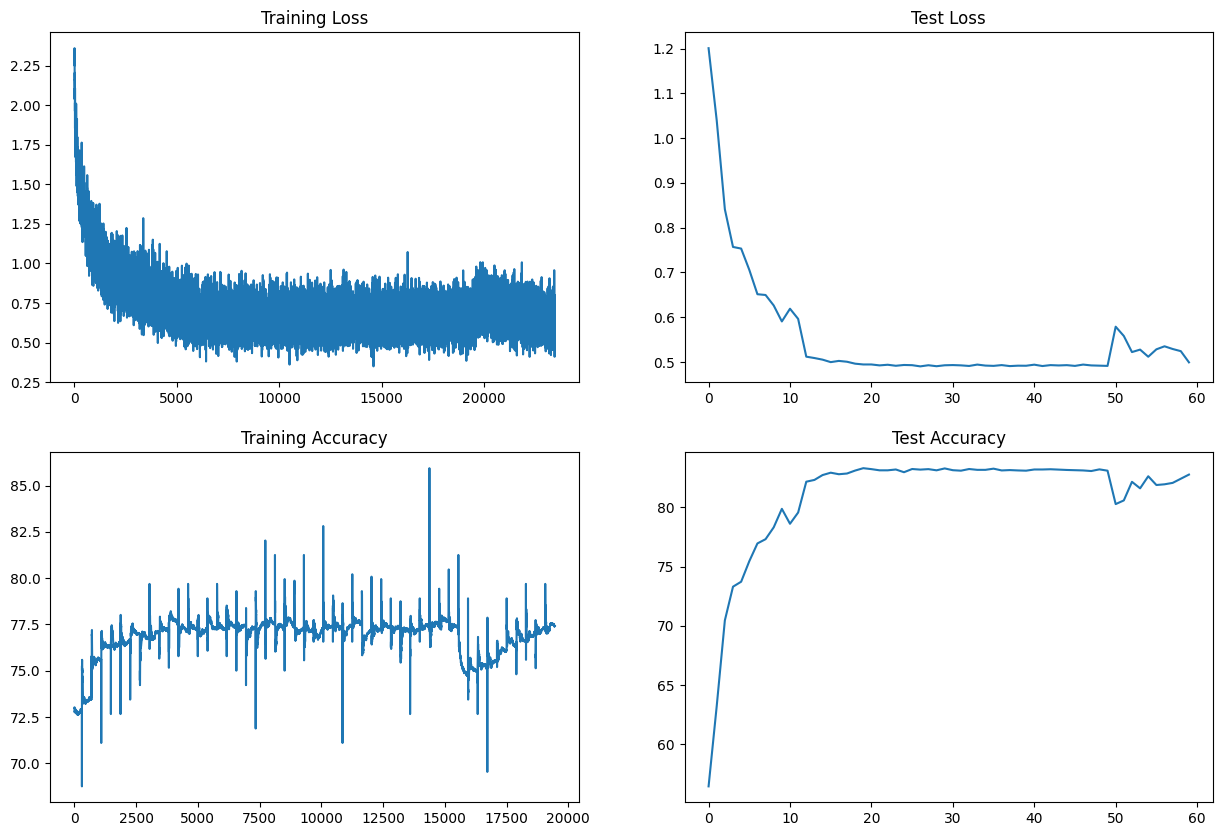

In [32]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2,2,figsize=(15,10))
axs[0, 0].plot(train_losses)
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(train_acc[4000:])
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(test_losses)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(test_acc)
axs[1, 1].set_title("Test Accuracy")

In [33]:
misclassified_images, predictions, labels = get_misclassified_images(model, test_loader, device)

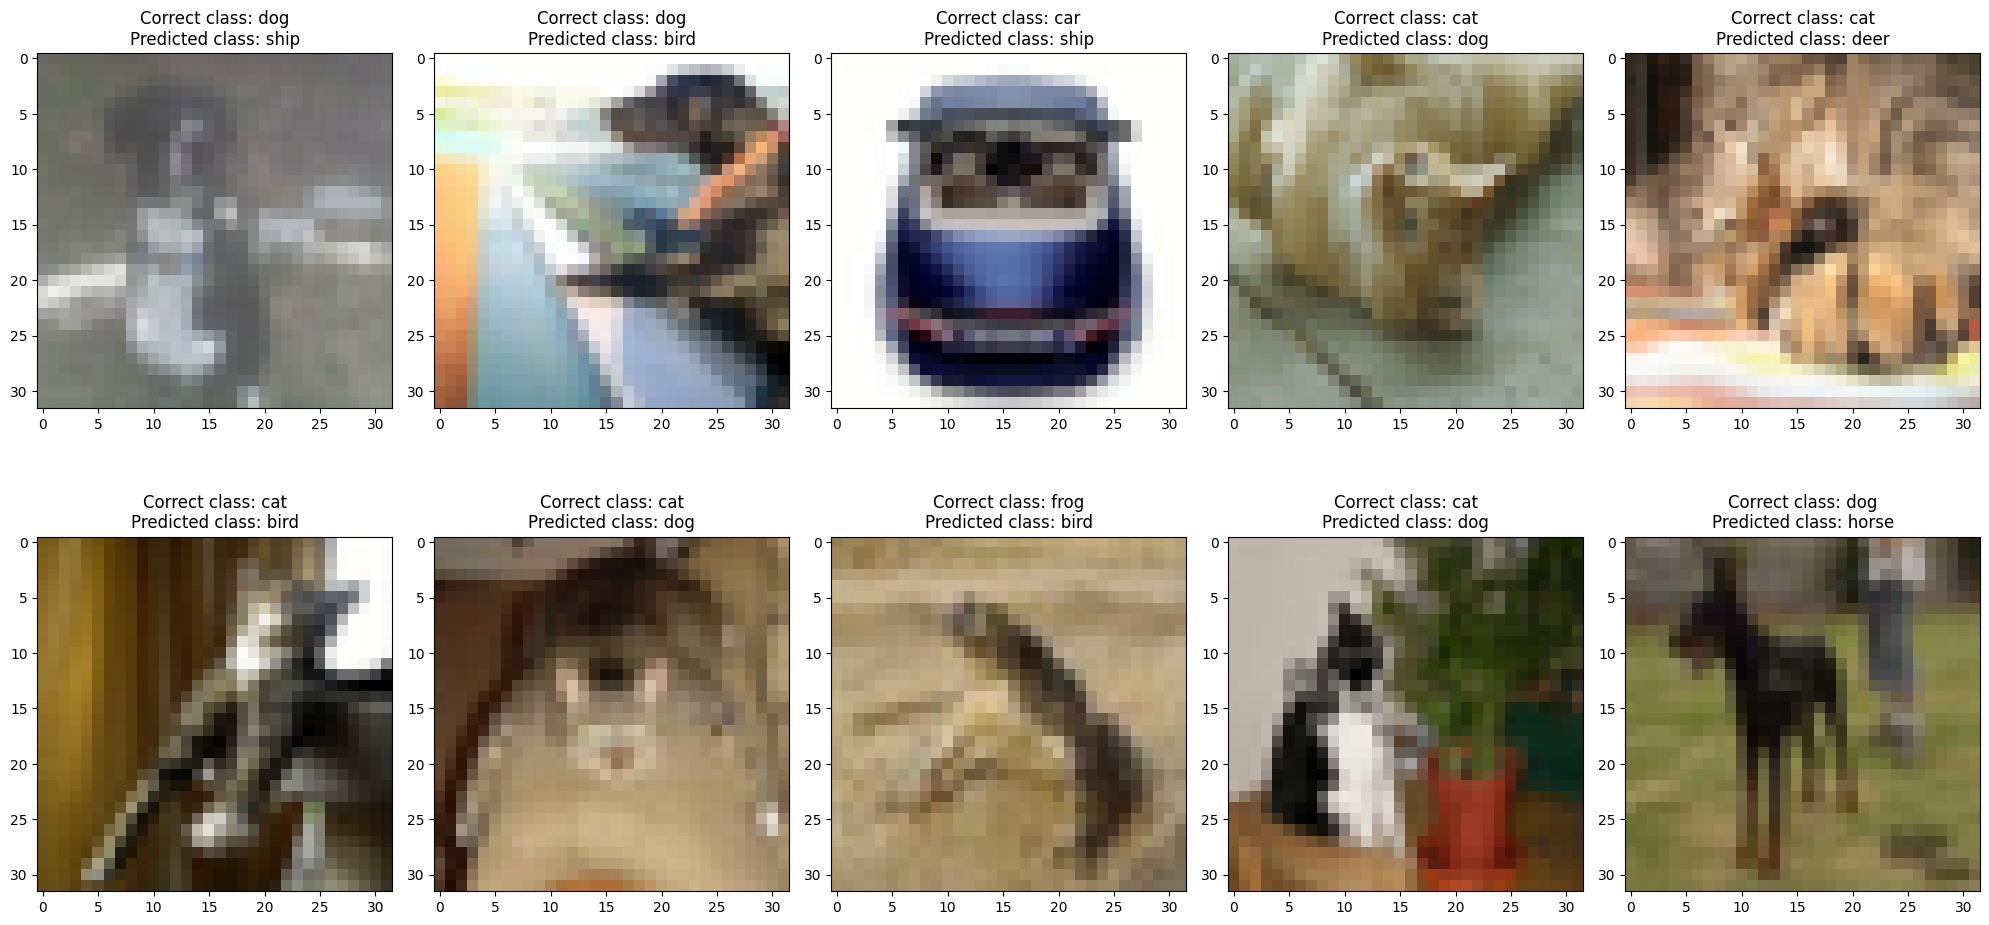

In [34]:
show_misclassified_images(
    misclassified_images[:10],
    predictions[:10],
    labels[:10],
    classes,
)